In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

In [2]:
watercolor = 'lightskyblue'
landcolour = 'papayawhip'

In [3]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [3]:
data3d = xr.open_dataset('/Users/sallen/Documents/MIDOSS/Lagrangian_bunker-14_northern_strait_first30-14.nc')

In [4]:
data3d

<xarray.Dataset>
Dimensions:                  (grid_x: 396, grid_x_latlon: 397, grid_y: 896, grid_y_latlon: 897, grid_z: 40, time: 58)
Coordinates:
  * time                     (time) datetime64[ns] 2018-12-09T00:30:00 ... 20...
  * grid_y                   (grid_y) int16 0 1 2 3 4 5 ... 891 892 893 894 895
  * grid_x                   (grid_x) int16 0 1 2 3 4 5 ... 391 392 393 394 395
  * grid_z                   (grid_z) int16 0 1 2 3 4 5 6 ... 34 35 36 37 38 39
  * grid_y_latlon            (grid_y_latlon) float32 0.0 1.0 2.0 ... 895.0 896.0
  * grid_x_latlon            (grid_x_latlon) float32 0.0 1.0 2.0 ... 395.0 396.0
Data variables:
    OilConcentration_2D      (time, grid_y, grid_x) float64 ...
    Thickness_2D             (time, grid_y, grid_x) float64 ...
    Dissolution_3D           (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D      (time, grid_z, grid_y, grid_x) float64 ...
    OilWaterColumnOilVol_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Latitude                 (grid_y_latlon, grid_x_latlon) float64 ...
    Longitude                (grid_y_latlon, grid_x_latlon) float64 ...
    Beaching_Time            (grid_y, grid_x) datetime64[ns] ...
    Beaching_Volume          (grid_y, grid_x) float64 ...
    Oil_Arrival_Time         (grid_y, grid_x) datetime64[ns] ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Fri Jun 11 22:46:20 2021: ncks -4 -L4 -A /loc...
    NCO:                        4.6.6
    history_of_appended_files:  Fri Jun 11 22:46:20 2021: Appended file /loca...

In [8]:
imin, imax = 520, 720
jmin, jmax = 100, 300
y_slice = np.arange(imin, imax)
x_slice = np.arange(jmin, jmax)

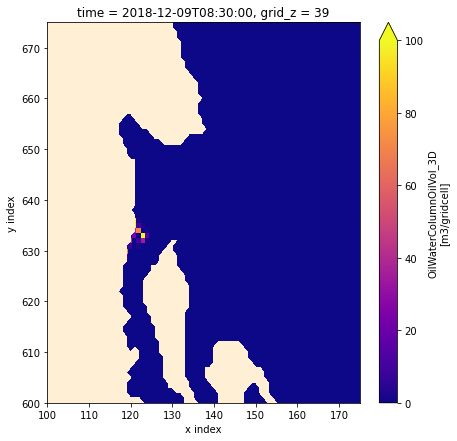

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
data3d.OilWaterColumnOilVol_3D[8, 39, imin:imax, jmin:jmax].plot(ax=ax, cmap='plasma', vmax=100);
viz_tools.plot_land_mask(ax, '/Users/sallen/Documents/MEOPAR/grid/bathymetry_201702.nc', 
                         xslice=x_slice, yslice=y_slice, color=landcolour)
ax.set_ylim(600, 675)
ax.set_xlim(100, 175);

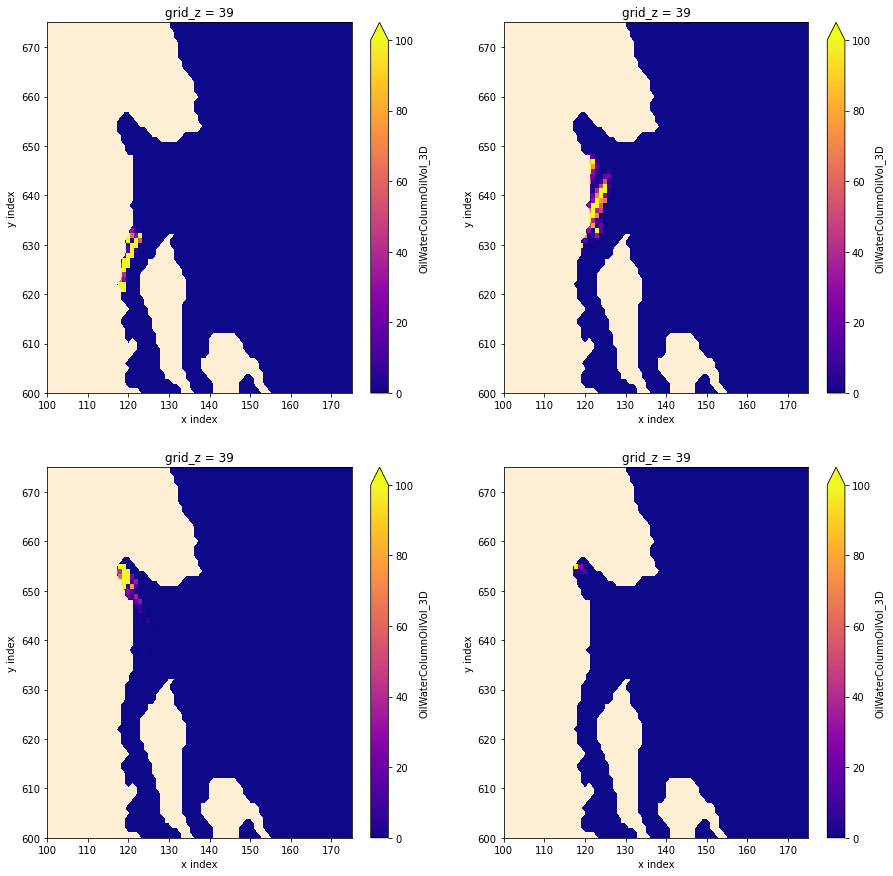

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
data3d.OilWaterColumnOilVol_3D[:8, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0, 0], cmap='plasma', vmax=100);
data3d.OilWaterColumnOilVol_3D[8:15, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0, 1], cmap='plasma', vmax=100)
data3d.OilWaterColumnOilVol_3D[15:24, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1, 0], cmap='plasma', vmax=100)
data3d.OilWaterColumnOilVol_3D[24:35, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1, 1], cmap='plasma', vmax=100)
for ax in [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]:
    viz_tools.plot_land_mask(ax, '/Users/sallen/Documents/MEOPAR/grid/bathymetry_201702.nc', 
                         xslice=x_slice, yslice=y_slice, color=landcolour)
    ax.set_ylim(600, 675)
    ax.set_xlim(100, 175);

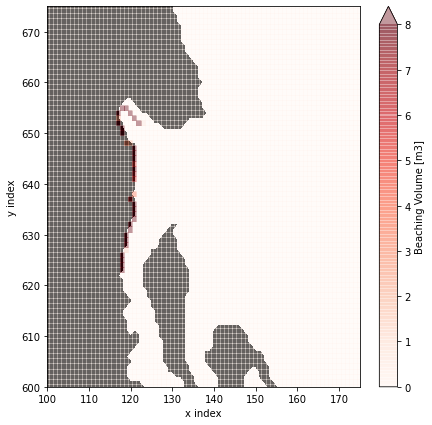

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
viz_tools.plot_land_mask(ax, '/Users/sallen/Documents/MEOPAR/grid/bathymetry_201702.nc', 
                         xslice=x_slice, yslice=y_slice, color='black')
data3d.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=ax, cmap='Reds', vmax=8, alpha=0.4);

ax.set_ylim(600, 675)
ax.set_xlim(100, 175);

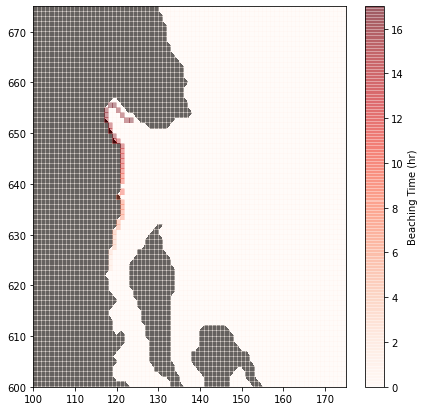

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
viz_tools.plot_land_mask(ax, '/Users/sallen/Documents/MEOPAR/grid/bathymetry_201702.nc', 
                         xslice=x_slice, yslice=y_slice, color='black')
btime = (np.array(data3d.Beaching_Time - data3d.Beaching_Time.min())
        ) /  np.timedelta64(1, 's') /3600.

colours = ax.pcolormesh(btime, cmap='Reds', alpha=0.4);
cb = fig.colorbar(colours)
cb.set_label('Beaching Time (hr)')

ax.set_ylim(600, 675)
ax.set_xlim(100, 175);

In [78]:
profile = data3d.OilWaterColumnOilVol_3D[:, :, imin:imax, jmin:jmax].sum(axis=3).sum(axis=2).sum(axis=0)

(35.0, 40.0)

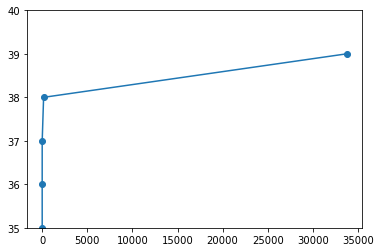

In [87]:
fig, ax = plt.subplots(1, 1)
ax.plot(profile, profile.grid_z, 'o-')
ax.set_ylim(35, 40)

In [82]:
profile

<xarray.DataArray 'OilWaterColumnOilVol_3D' (grid_z: 40)>
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.67400000e-01,
       1.15660000e+00, 1.15670000e+00, 4.04840000e+00, 2.89140000e+00,
       3.47020000e+00, 2.31360000e+00, 2.31310000e+00, 3.75900000e+00,
       2.31330000e+00, 4.04810000e+00, 1.59553000e+02, 3.37277281e+04])
Coordinates:
  * grid_z   (grid_z) int16 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39

## Compare a Big and a Small Spill

In [7]:
big = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/Lagrangian_bunker-14_northern_strait_first30-14.nc')
small = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/Lagrangian_diesel-6_northern_strait_first30-6.nc')

In [42]:
biglimit = np.ma.masked_array(big.OilWaterColumnOilVol_3D, big.OilWaterColumnOilVol_3D < 0.001).sum(axis=0)
smalllimit = np.ma.masked_array(small.OilWaterColumnOilVol_3D, small.OilWaterColumnOilVol_3D < 0.001).sum(axis=0)

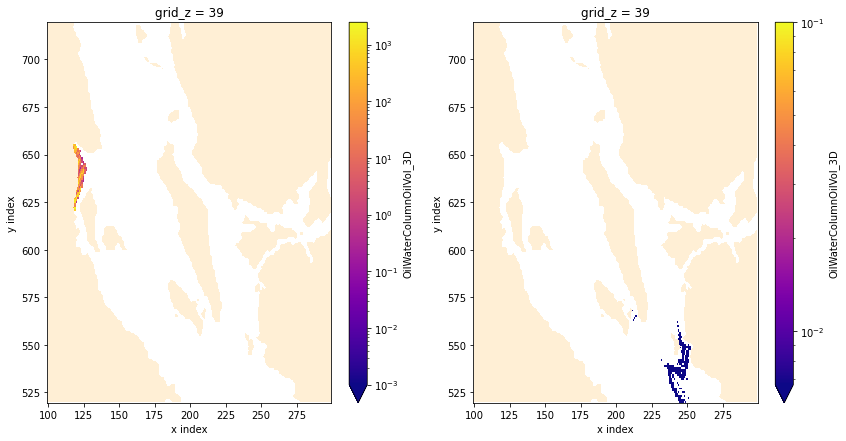

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
big.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0], cmap='plasma', norm=colors.LogNorm(vmin=0.001));
small.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1], cmap='plasma', norm=colors.LogNorm(vmin=0.1), vmin=1e-1);
for ax in axs:
    viz_tools.plot_land_mask(ax, '/home/sallen/MEOPAR/grid/bathymetry_201702.nc', 
                         xslice=x_slice, yslice=y_slice, color=landcolour)

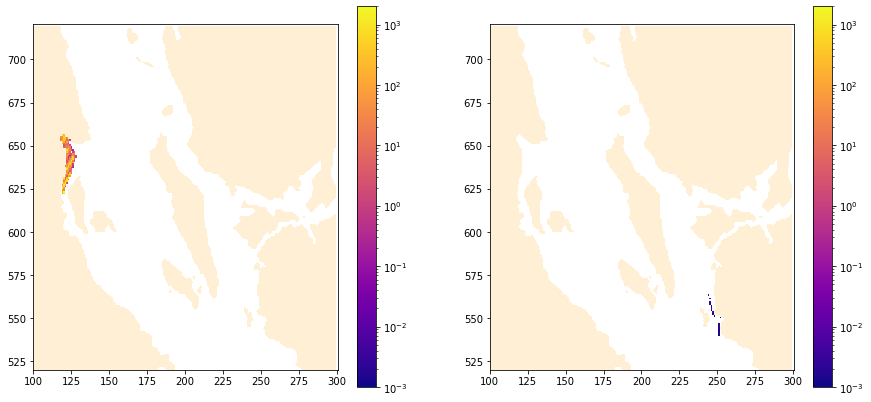

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
for ax in axs:
    viz_tools.plot_land_mask(ax, '/home/sallen/MEOPAR/grid/bathymetry_201702.nc', 
                         xslice=x_slice, yslice=y_slice, color=landcolour)
    viz_tools.set_aspect(ax);
colours = axs[0].pcolormesh(np.arange(jmin,jmax+1)+0.75, np.arange(imin,imax+1)+0.75, biglimit[39, imin:imax , jmin:jmax], cmap='plasma', norm=colors.LogNorm(vmin=0.001, vmax=2000));
cb = fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(np.arange(jmin,jmax+1)+0.75, np.arange(imin,imax+1)+0.75, smalllimit[39, imin:imax , jmin:jmax], cmap='plasma', norm=colors.LogNorm(vmin=0.001, vmax=2000));
cb = fig.colorbar(colours, ax=axs[1])


In [18]:
big = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/Lagrangian_bunker-0_northern_strait_first30-14_pa.nc')
small = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/Lagrangian_diesel-0_northern_strait_first30-6_pa.nc')

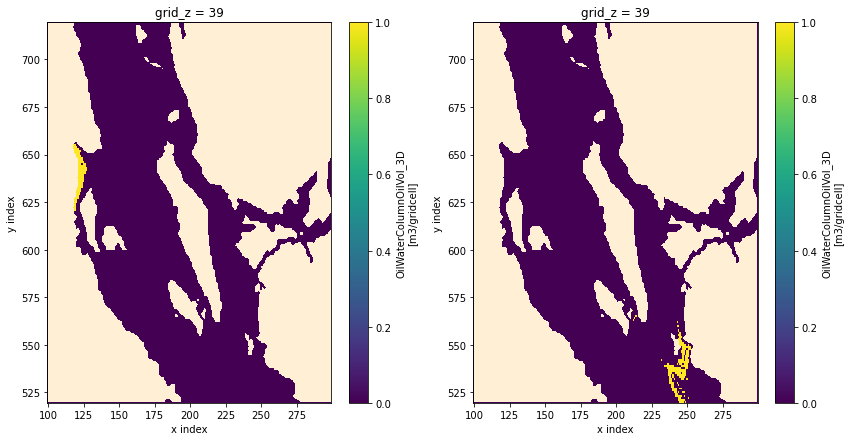

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
big.presence[39, imin:imax, jmin:jmax].plot(ax=axs[0], );
small.presence[39, imin:imax, jmin:jmax].plot(ax=axs[1], );
for ax in axs:
    viz_tools.plot_land_mask(ax, '/home/sallen/MEOPAR/grid/bathymetry_201702.nc', 
                         xslice=x_slice, yslice=y_slice, color=landcolour)

In [45]:
0.05e-6*500*500

0.012499999999999999